In [1]:
import pandas as pd
data=pd.read_csv("../data/nerlove.csv")
data

,总成本TC,产量Q,工资率PL,燃料价格PF,资本租赁价格PK
0,0.082,2,2.09,17.9,183
1,0.661,3,2.05,35.1,174
2,0.990,4,2.05,35.1,171
3,0.315,4,1.83,32.2,166
4,0.197,5,2.12,28.6,233
...,...,...,...,...,...
140,44.894,9956,1.68,28.8,203
141,67.120,11477,2.24,26.5,151
142,73.050,11796,2.12,28.6,148
143,139.422,14359,2.31,33.5,212


In [2]:
data = data.rename(columns = {"总成本TC":"TC",
                              "产量Q":"Q",
                              "工资率PL":"PL",
                              "燃料价格PF":"PF",
                              "资本租赁价格PK":"PK"})
data

,TC,Q,PL,PF,PK
0,0.082,2,2.09,17.9,183
1,0.661,3,2.05,35.1,174
2,0.990,4,2.05,35.1,171
3,0.315,4,1.83,32.2,166
4,0.197,5,2.12,28.6,233
...,...,...,...,...,...
140,44.894,9956,1.68,28.8,203
141,67.120,11477,2.24,26.5,151
142,73.050,11796,2.12,28.6,148
143,139.422,14359,2.31,33.5,212


In [3]:
import scipy.stats as stats
print('总成本(TC)和产量(Q)之间的相关系数：', stats.pearsonr(data['TC'], data['Q'])[0])

总成本(TC)和产量(Q)之间的相关系数： 0.9525036987666797


In [4]:
print('总成本(TC)和工资率(PL)之间的相关系数：', stats.pearsonr(data['TC'], data['PL'])[0])
print('总成本(TC)和燃料价格(PF)之间的相关系数：', stats.pearsonr(data['TC'], data['PF'])[0])
print('总成本(TC)和资本租赁价格(PK)之间的相关系数：', stats.pearsonr(data['TC'], data['PK'])[0])

总成本(TC)和工资率(PL)之间的相关系数： 0.2513375371793568
总成本(TC)和燃料价格(PF)之间的相关系数： 0.03393518914410797
总成本(TC)和资本租赁价格(PK)之间的相关系数： 0.027202000447357114


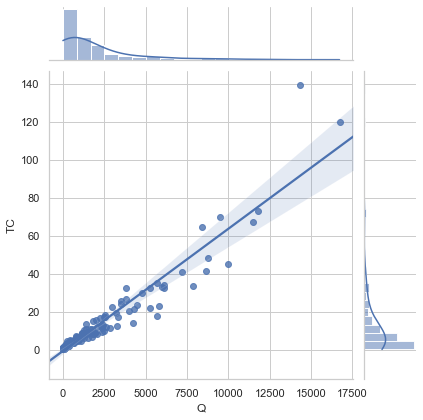

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
g = sns.jointplot(x="Q", y="TC", data=data,
                  kind="reg", truncate=False,
                  height=6)

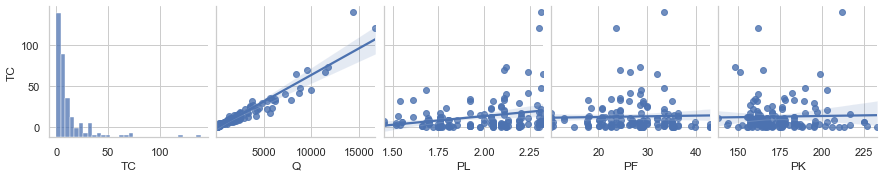

In [6]:
sns.pairplot(data, kind="reg", y_vars=["TC"])

<AxesSubplot:>

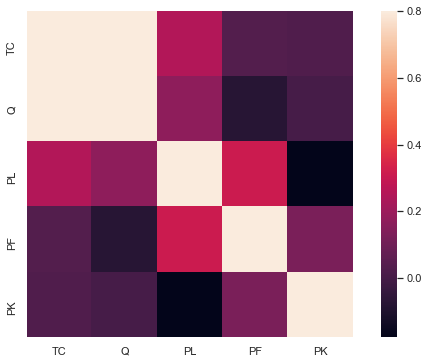

In [7]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [8]:
import statsmodels.api as sm
data['Intercept'] = 1.
x = data[['Intercept', 'Q', 'PL', 'PF', 'PK']]
y = data['TC']
x

,Intercept,Q,PL,PF,PK
0,1.0,2,2.09,17.9,183
1,1.0,3,2.05,35.1,174
2,1.0,4,2.05,35.1,171
3,1.0,4,1.83,32.2,166
4,1.0,5,2.12,28.6,233
...,...,...,...,...,...
140,1.0,9956,1.68,28.8,203
141,1.0,11477,2.24,26.5,151
142,1.0,11796,2.12,28.6,148
143,1.0,14359,2.31,33.5,212


In [9]:
model = sm.OLS(y, x)
result = model.fit()
result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     TC   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     418.1
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           9.26e-77
Time:                        17:00:39   Log-Likelihood:                -452.47
No. Observations:                 145   AIC:                             914.9
Df Residuals:                     140   BIC:                             929.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2210      6.587     -3.373      0.001     -35.245      -9.197
Q              0.0064      0.000     39.258      0.000       0.006       0.007
PL             5.6552      2.176      2.598      0.010       1.352       9.958
PF             0.2078      0.064      3.242      0.001       0.081       0.335
PK             0.0284      0.027      1.073      0.285      -0.024       0.081
==============================================================================
Omnibus:                      135.057   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4737.912
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      30.394   Cond. No.                     5.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print(result.summary(alpha=0.05))  #指定显著性水平

                            OLS Regression Results                            
Dep. Variable:                     TC   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     418.1
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           9.26e-77
Time:                        17:00:39   Log-Likelihood:                -452.47
No. Observations:                 145   AIC:                             914.9
Df Residuals:                     140   BIC:                             929.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2210      6.587     -3.373      0.0